In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_calc = pd.read_csv('../result/calc.csv',sep=' ', index_col=False)

In [22]:
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,0,-0.946723,0.563538,1.10175,2.423790e+04,1.161930e+05,2.423700e+04,1.161920e+05,1.404290e+05
1,1,-1.834390,-0.712716,1.96798,1.081220e+05,2.457680e+05,1.081180e+05,2.457670e+05,3.538860e+05
2,2,2.784620,1.346660,3.09315,8.157460e+05,1.053960e+06,8.157380e+05,1.053960e+06,1.869700e+06
3,3,5.506060,-0.504492,5.52912,1.139190e+06,1.202440e+06,1.139160e+06,1.202440e+06,2.341590e+06
4,4,7.055090,-0.484309,7.07170,1.218100e+06,1.433250e+06,1.218060e+06,1.433250e+06,2.651310e+06
...,...,...,...,...,...,...,...,...,...
9447,9447,-4698.020000,-2365.070000,5259.75000,3.790110e+12,2.609020e+12,3.790090e+12,2.609010e+12,6.399100e+12
9448,9448,-4697.940000,-2364.280000,5259.32000,3.790110e+12,2.609020e+12,3.790090e+12,2.609010e+12,6.399100e+12
9449,9449,-4697.480000,-2364.610000,5259.06000,3.790110e+12,2.609020e+12,3.790090e+12,2.609010e+12,6.399100e+12
9450,9450,-4697.300000,-2365.620000,5259.35000,3.790110e+12,2.609020e+12,3.790090e+12,2.609010e+12,6.399100e+12


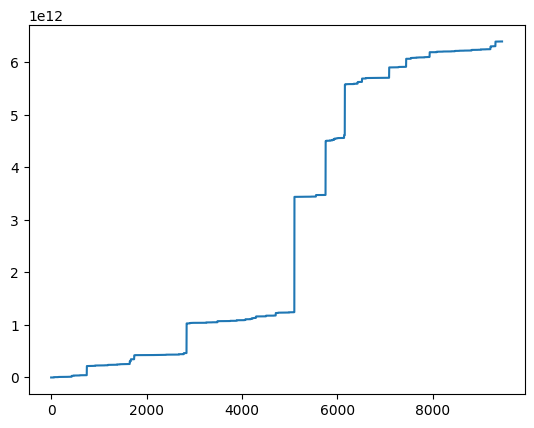

In [23]:
plt.plot(data_calc['<ΔR^2>'])

In [24]:
data_first_particle = pd.read_csv('../result/first_particle.csv',sep=' ', index_col=False)

In [25]:
data_first_particle

,x,y
0,1.23170,0.000000
1,1.23170,0.540713
2,5.97785,0.540713
3,0.84466,0.540713
4,0.84466,4.189140
...,...,...
9447,2101.54000,41905.400000
9448,2100.44000,41905.400000
9449,2090.10000,41905.400000
9450,2090.10000,41905.000000


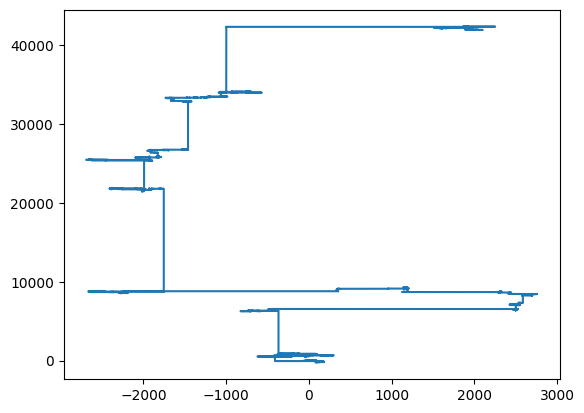

In [26]:
plt.plot(data_first_particle.x,data_first_particle.y)

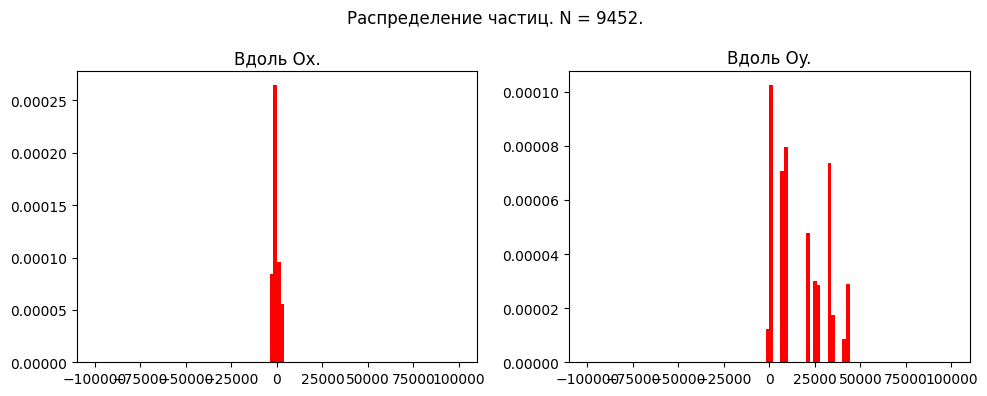

In [28]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {len(data_first_particle.x)}.')

plt.subplot(1,2,1)
plt.hist(data_first_particle.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e5, 1e5))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_first_particle.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e5, 1e5))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()